# GGR274 Lab 5: Data Transformations, Grouped Data, and Data Visualization

## Logistics

Like last week, our lab grade will be based on attendance and submission of a few small tasks to MarkUs during the lab session (or by 23:59 on Thursday).

Complete the tasks in this Jupyter notebook and submit your completed file to [MarkUs](https://markus.teach.cs.toronto.edu/markus/main/login_remote_auth).
Here are the instructions for submitting to MarkUs (same as last week):

1. Download this file (`Lab_5.ipynb`) from JupyterHub. (See [our JupyterHub Guide](../../../guides/jupyterhub_guide.ipynb) for detailed instructions.)
2. Submit this file to MarkUs under the **lab5** assignment. (See [our MarkUs Guide](../../../guides/markus_guide.ipynb) for detailed instructions.)

Note: Use autotests with this week"s lab to see if you are on the right track. It's important to follow the steps so your answers match the solution in not only the way they appear on screen, but also in data types, in white spaces, in rounding, etc.

## Lab 5 Introduction

In this lab, you will work with  a data set called `time_use_prov`. This is a data set derived from the Statistics Canada General Social Survey's (GSS) Time Use (TU) Survey Main File, as well as a data set containing information on aggregated provincial data. This week you will plot box plots, bar graphs, and use the logical operators from Week 4 material to develop subsets to visualize data on.

As usual, these labs are meant to facilitate your understanding of the material from lectures in a low-stakes environment. Please feel free to refer to your lecture content, collaborate with your peers, and seek out help from your TAs.

## Task 1

Read CSV file `"time_use_prov.csv"` into a pandas `DataFrame` named `prov_data`.

In [1]:
import pandas as pd

prov_data = pd.read_csv("time_use_prov.csv")

prov_data.head()

/var/folders/0j/ybsv4ncn5w50v40vdh5jjlww0000gn/T/ipykernel_82472/3392639886.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Unnamed: 0,Participant ID,Urban/Rural,Age Group,Marital Status,sex,Kids under 14,Feeling Rushed,Sleep duration,Work duration,Prov_ab,Employment Rate,Pct house over 30,region,Income
0,0,10000,1,5,5,1,0,1,510,0,MB,61.7,11.4,Prairies,68147.0
1,1,10009,1,6,3,1,0,6,540,0,MB,61.7,11.4,Prairies,68147.0
2,2,10016,2,7,1,1,0,6,660,0,MB,61.7,11.4,Prairies,68147.0
3,3,10023,1,6,1,2,0,3,330,0,MB,61.7,11.4,Prairies,68147.0
4,4,10047,2,7,1,1,0,3,510,0,MB,61.7,11.4,Prairies,68147.0


## Task 2

a) Create a new column in `prov_data` named `"age_bin"`.  The values of `"age_bin"` should be obtained from the `"age"` column in `prov_data` which has the values:

```
            Age group of respondent (groups of 10)

           VALUE  LABEL
               1  15 to 24 years
               2  25 to 34 years
               3  35 to 44 years
               4  45 to 54 years
               5  55 to 64 years
               6  65 to 74 years
               7  75 years and over
              96  Valid skip
              97  Don't know
              98  Refusal
              99  Not stated
```

`"age_bin"` should have the values `"youth"`, `"young"`, `"middle"`, `"senior"` defined as :

- `"youth"`  : ages 15-24
- `"young"`  : ages 25-44
- `"middle"` : ages 45-64
- `"senior"` : ages 65+

In [2]:
# Solution

age = prov_data["Age Group"]

youth = (age == 1)
young = (age == 2) | (age == 3)
middle = (age == 4) | (age == 5)
senior = (age == 6) | (age == 7)

prov_data.loc[youth, "age_bin"] = "youth"
prov_data.loc[young, "age_bin"] = "young"
prov_data.loc[middle, "age_bin"] = "middle"
prov_data.loc[senior, "age_bin"] = "senior"

b) Compute the distribution of `age_bin` as counts, and store the count distribution in `age_bin_count_dist`. Then compute `age_bin` as a proportion of the total population, and store this in `age_bin_prop_dist`.

In [3]:
age_bin_count_dist = prov_data["age_bin"].value_counts()

age_bin_count_dist

age_bin
middle    6530
senior    4833
young     4724
youth     1303
Name: count, dtype: int64

In [4]:
age_bin_prop_dist = age_bin_count_dist / age_bin_count_dist.sum()

age_bin_prop_dist

age_bin
middle    0.375503
senior    0.277918
young     0.271650
youth     0.074928
Name: count, dtype: float64

c) Sort the values of `age_bin_prop_dist` in ascending order (smallest to largest) using the `sort_values` method.  The code is

```python
age_bin_prop_dist.sort_values(ascending=True, inplace=True)
```

> **(Not graded)** The `inplace=True` parameter in `sort_values` modifies `age_bin_prop_dist`. What do you predict would happen to `age_bin_prop_dist` if we used `age_bin_prop_dist.sort_values(ascending=True, inplace=False)` instead? 

In [5]:
age_bin_prop_dist.sort_values(ascending = True, inplace = True)

age_bin_prop_dist

age_bin
youth     0.074928
young     0.271650
senior    0.277918
middle    0.375503
Name: count, dtype: float64

> `age_bin_prop_dist.sort_values(ascending=True, inplace=False)` will return a `pd.Series` with the values sorted. However, unlike using `inplace=True`, it will not update the values stored in `age_bin_prop_dist`.

d) **(Not graded)** Create a bar plot of `age_bin_prop_dist`. 

_Feel free to explore different aesthetic options by changing paramters for the plotting function. (See the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html).)_

<Axes: title={'center': 'Distribution of age groups'}>

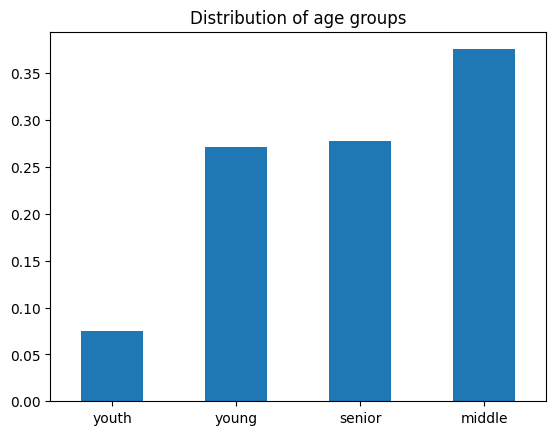

In [6]:
age_bin_prop_dist.plot.bar()
age_bin_prop_dist.plot.bar(
    rot=0, 
    title="Distribution of age groups", 
    xlabel=""
)

## Task 3

a) Create and store a boxplot of `Sleep duration` by `age_bin` to `sleep_by_age_boxplots` by completing the code below. 

1. Use `figsize=(8, 8)` inside the `pandas.DataFrame.boxplot()` function; 
2.  Set the label on the x-axis to `Age Group` by using the `.set_xlabel()` method, as follows:
```python
sleep_by_age_boxplots.set_xlabel("Age Group")
```
3. Set the label on the y-axis to `(minute)` by usign the `.set_ylabel()` method, as follows:
```python
sleep_by_age_boxplots.set_ylabel("(minute)")
```

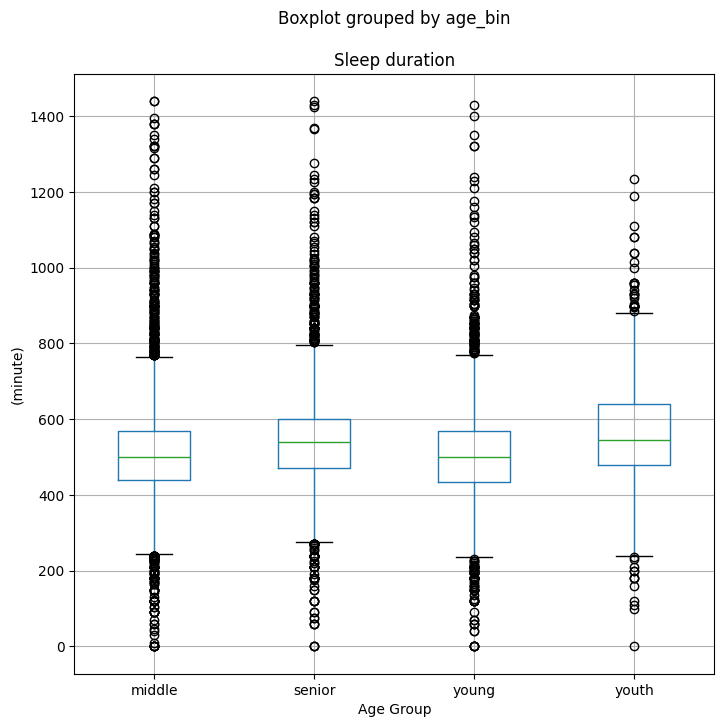

In [7]:
sleep_by_age_boxplots = prov_data.boxplot(
    column="Sleep duration", 
    by="age_bin", 
    figsize=(8,8)
);

sleep_by_age_boxplots.set_xlabel("Age Group");
sleep_by_age_boxplots.set_ylabel("(minute)");

# in case you don't see the plot without an error, try running the code below.
# sleep_by_age_boxplots.figure 


b) **(Not graded)** Feel free to customize a copy of the plot, `sleep_by_age_boxplots_copy`, further to your liking with the help of the [documention](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html).

Further customization. See [documentation on `pandas.Categorical`](https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html) for more information on the method.

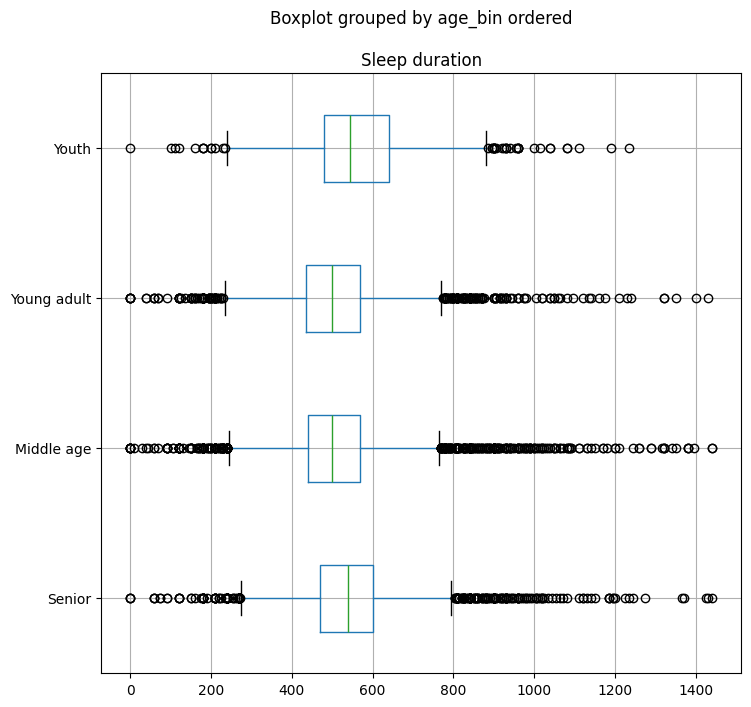

In [8]:
sleep_by_age_boxplots_copy = sleep_by_age_boxplots

prov_data["age_bin ordered"] = pd.Categorical(
    prov_data["age_bin"],
    categories = [
        "senior",
        "middle",
        "young",
        "youth"
    ],
    ordered = True
)

sleep_by_age_boxplots_copy = prov_data.boxplot(
    column = "Sleep duration", 
    by = "age_bin ordered", 
    figsize = (8,8),
    vert = False
);

sleep_by_age_boxplots_copy.set_xlabel("");
sleep_by_age_boxplots_copy.set_ylabel("");
sleep_by_age_boxplots_copy.set_yticklabels([
    "Senior",
    "Middle age",
    "Young adult",
    "Youth"
]);

# in case you don't see the plot without an error, try running the code below.
# sleep_by_age_boxplots_copy.figure

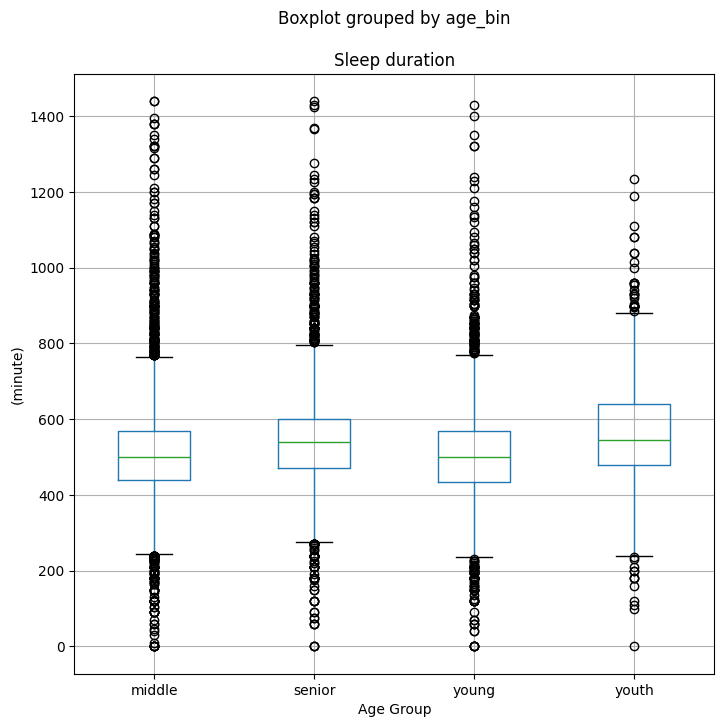

In [9]:
sleep_by_age_boxplots.figure 